
Raices de la funcion por metodos abiertos y cerrados

╒═════════════╤═════════════╤═══════════╤══════════════╤══════════════════╤═══════════╤═══════════════╕
│   Iteracion │   Biseccion │   Fal Pos │   Punto fijo │   Newton-Raphson │   Secante │   Secante Mod │
╞═════════════╪═════════════╪═══════════╪══════════════╪══════════════════╪═══════════╪═══════════════╡
│           1 │    0.5      │  0.6127   │     0        │         0        │  0        │      0        │
├─────────────┼─────────────┼───────────┼──────────────┼──────────────────┼───────────┼───────────────┤
│           2 │    0.75     │  0.572181 │     1        │         0.5      │  0.6127   │      0.537263 │
├─────────────┼─────────────┼───────────┼──────────────┼──────────────────┼───────────┼───────────────┤
│           3 │    0.625    │  0.567703 │     0.367879 │         0.566311 │  0.563838 │      0.59263  │
├─────────────┼─────────────┼───────────┼──────────────┼──────────────────┼───────────┼───────────────┤
│        

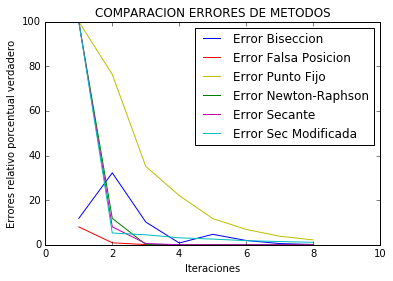

In [5]:
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

xVerd=0.56714329
xl, xu, xr, fA, fB, f1, f2, f3, xl2, xu2, xr2=0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0
aux1,aux2,aux3,aux4,aux5,aux6, aux7,aux8,aux9,aux10,aux11,aux12=[],[],[],[],[],[],[],[],[],[],[],[]
tabla, tablaErrores, iteraciones=[],[],[]
Error1,Error2,Error3,Error4,Error5, Error6=[],[],[],[],[],[]
raizB,raizFP,raizPF,raizNR,raizS,raizSM=[],[],[],[],[],[]
cont=0

def evaluar(x):
    fx=math.exp(-x)-x
    return fx
#Biseccion    
while(round(xr,8)!=xVerd):
    xr=(xl+xu)/2
    raizB.append(xr)
    fA=evaluar(xl)
    fB=evaluar(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    Error1.append(erpv)
    if ((fA*fB)<0):
        xu=xr
    if((fA*fB)>0):
         xl=xr 
#falsa posicion
while ((f1*f3)!=0):
    f1=evaluar(xl2)
    f2=evaluar(xu2)
    xr2=xu2-(f2*(xl2-xu2))/(f1-f2)
    raizFP.append(xr2)
    f3=evaluar(xr2)
    erpv2=math.fabs(((xVerd-xr2)/xVerd)*100)
    Error2.append(erpv2)
    if ((f1*f3)<0):
        xu2=xr2
    if((f1*f3)>0):
         xl2=xr2 
#punto fijo
xo=0
for i in range(0, len(Error2)):
    if(i==0):
        raizPF.append(0)
        Error3.append(100)
    else: 
        xi=math.exp(-xo)
        xo=xi
        raizPF.append(xo)
        erpv3=math.fabs(((xVerd-xi)/xVerd)*100)
        Error3.append(erpv3)
#Newton Raphson
xo1=0
for i in range(0, len(Error2)):
    if(i==0):
        raizNR.append(0)
        Error4.append(100)
    else: 
        xi1=xo1-((math.exp(-xo1)-xo1)/((-1*math.exp(-xo1))-1))
        xo1=xi1
        raizNR.append(xo1)
        erpv4=math.fabs(((xVerd-xi1)/xVerd)*100)
        Error4.append(erpv4)
#Secante
xAnt=0
xAct=1.0
for i in range(0, len(Error2)):
    if(i==0):
        raizS.append(0)
        Error5.append(100)
    else: 
        if((evaluar(xAnt)-evaluar(xAct))==0):
            raizS.append("null")
        else:
            xi2=xAct-((evaluar(xAct)*(xAnt-xAct))/(evaluar(xAnt)-evaluar(xAct)))
            xAnt=xAct
            xAct=xi2
            raizS.append(xi2)
            erpv5=math.fabs(((xVerd-xi2)/xVerd)*100)
            Error5.append(erpv5)
#Secante Modificada
xIn=1.0
delta=0.01
for i in range(0, len(Error2)):
    if(i==0):
        raizSM.append(0)
        Error6.append(100)
    else: 
        var=xIn+(delta*xIn)
        xNew=xIn-((delta*evaluar(xIn))/(evaluar(var)-evaluar(xIn)))
        xIn=xNew
        raizSM.append(xIn)
        erpv6=math.fabs(((xVerd-raizSM[i])/xVerd)*100)
        Error6.append(erpv6)

for d in range (len(Error5)):
    cont+=1
    iteraciones.append(cont)
    aux1.append(Error1[d])
    aux2.append(Error2[d])
    aux3.append(raizB[d])
    aux4.append(raizFP[d])
    aux5.append(raizPF[d])
    aux6.append(Error3[d])
    aux7.append(raizNR[d])
    aux8.append(Error4[d])
    aux9.append(raizS[d])
    aux10.append(Error5[d])
    aux11.append(raizSM[d])
    aux12.append(Error6[d])
    tabla.append([iteraciones[d], aux3[d], aux4[d], aux5[d], aux7[d],aux9[d],aux11[d]])
    tablaErrores.append([iteraciones[d], str(aux1[d])+"%", str(aux2[d])+"%", str(aux6[d])+"%", str(aux8[d])+"%",str(aux10[d])+"%",str(aux12[d])+"%"])

print "\nRaices de la funcion por metodos abiertos y cerrados\n"
print tabulate(tabla, headers=["Iteracion", "Biseccion", "Fal Pos", "Punto fijo", "Newton-Raphson", "Secante", "Secante Mod"], tablefmt="fancy_grid")
print "\nError relativo porcentual verdadero de cada metodo\n"
print tabulate(tablaErrores, headers=["Iteracion", "Error B", "Error FP", "Error PuntoFijo","Error Nwt", "Error Sec", "Error SecMo"], tablefmt="fancy_grid")

plt.title("COMPARACION ERRORES DE METODOS")
plt.axis([0, 10, 0, 100])
plt.ylabel('Errores relativo porcentual verdadero')
plt.xlabel('Iteraciones')
plt.plot(iteraciones, aux1, 'b-', label="Error Biseccion")
plt.plot(iteraciones, aux2, 'r-', label="Error Falsa Posicion")
plt.plot(iteraciones, aux6, 'y-', label="Error Punto Fijo")
plt.plot(iteraciones, aux8, 'g-', label="Error Newton-Raphson")
plt.plot(iteraciones, aux10, 'm-', label="Error Secante")
plt.plot(iteraciones, aux12, 'c-', label="Error Sec Modificada")
plt.legend(loc = 'upper right', numpoints = 2)
plt.show()
    